In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 数据预处理

In [0]:
import pandas as pd
import numpy as np
x_data = pd.read_csv('/content/drive/My Drive/研一/模式识别/数据/X_train.csv')
y_data = pd.read_csv('/content/drive/My Drive/研一/模式识别/数据/Y_train.csv')
x_data = np.array(x_data)
y_data = np.array(y_data)
print(x_data.shape)
print(y_data.shape)

(32561, 106)
(32561, 1)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report

test = pd.read_csv('/content/drive/My Drive/研一/模式识别/数据/X_test.csv')
test = np.array(test)
print('test', test.shape)
x_data = np.append(x_data, test, axis=0)
x_data = preprocessing.MaxAbsScaler().fit_transform(x_data)
test = x_data[32561:48842, :]
print(x_data.shape, test.shape)
x_data = x_data[0:32561, :]


selected_num = 32561
x_data = x_data[0:selected_num, :]
y_data = y_data[0:selected_num]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=2)

test (16281, 106)
(48842, 106) (16281, 106)


In [0]:
print(x_train.shape, x_test.shape)

(29304, 106) (3257, 106)


# 逻辑回归

In [0]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression() #调用模型，但是并未经过任何调参操作，使用默认值
lr_model.fit(x_train,y_train) #训练模型
 
print(lr_model.score(x_test,y_test))  #获取测试集的评分

0.8459412427065206


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def logistic_regression(x, y, iterations, alpha, print_step):
  x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
  w = np.random.random((x.shape[1],1))
  for i in range(iterations):
    z = np.dot(x, w)
    pre = sigmoid(z)
    error = pre - y
    grad = np.dot(x.T, error)
    # print(grad.shape)
    w -= alpha*grad
    if i % print_step == 0:
      e = np.exp(-10)
      NLL = -np.sum(y*np.log(pre+e) + (1-y)*np.log(1-pre+e))
      acc = np.sum(np.round(pre)==y)/(y.shape[0]*1.0)
      print('iteration{}:NLL loss{}, train accuracy{}'.format(i, NLL, acc))
  return w

def logistic_regression_predict(x, w):
  x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
  z = np.dot(x, w)
  preds = sigmoid(z)
  return np.round(preds)


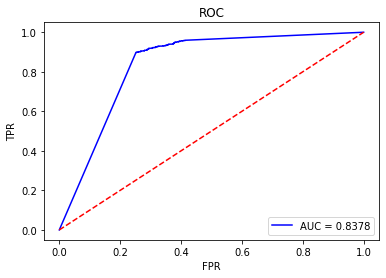

In [0]:
from sklearn.metrics import roc_curve, auc
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()
plot_roc(y_test[:, 0], preds[:, 0])

In [0]:
weights = logistic_regression(x_train, y_train, 20000, 0.1, 100)
preds = logistic_regression_predict(x_test, weights)

In [0]:
print('准确率：', np.sum(y_test[:, 0]==preds[:, 0])/y_test.shape[0])

准确率： 0.8323610684679152


In [0]:
weights = logistic_regression(x_train, y_train, 76, 0.1, 5)
preds = logistic_regression_predict(x_test, weights)
print(classification_report(y_test[:, 0], preds[:, 0]))

iteration0:NLL loss83078.53887496736, train accuracy0.23983073983073983
iteration5:NLL loss70278.98869307054, train accuracy0.7601692601692601
iteration10:NLL loss86557.50702955267, train accuracy0.7038288288288288
iteration15:NLL loss70268.98864872212, train accuracy0.7602033852033852
iteration20:NLL loss70268.98864872314, train accuracy0.7602033852033852
iteration25:NLL loss70228.99790336317, train accuracy0.7603398853398854
iteration30:NLL loss55204.39008924678, train accuracy0.810981435981436
iteration35:NLL loss70268.98865124916, train accuracy0.7602033852033852
iteration40:NLL loss83112.64925648514, train accuracy0.7143734643734644
iteration45:NLL loss70278.98849122107, train accuracy0.7601692601692601


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


iteration50:NLL loss49865.97712992449, train accuracy0.8283852033852034
iteration55:NLL loss69748.85766395672, train accuracy0.7619778869778869
iteration60:NLL loss78546.32191641598, train accuracy0.7305828555828556
iteration65:NLL loss49973.916114286905, train accuracy0.8288970788970789
iteration70:NLL loss54204.80697958774, train accuracy0.814018564018564
iteration75:NLL loss70288.98873951993, train accuracy0.7601351351351351
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2444
           1       0.68      0.61      0.65       813

    accuracy                           0.83      3257
   macro avg       0.78      0.76      0.77      3257
weighted avg       0.83      0.83      0.83      3257



# SVM

In [0]:
from sklearn.svm import SVC
# 多项式核函数
svc = SVC(kernel='poly', degree=3, gamma=1, coef0=0)
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
print(classification_report(y_test[:, 0], preds))
print('准确率：', np.sum(y_test[:, 0]==preds)/y_test.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.86      0.89      0.87       683
           1       0.61      0.54      0.57       217

    accuracy                           0.80       900
   macro avg       0.73      0.72      0.72       900
weighted avg       0.80      0.80      0.80       900

准确率： 0.8044444444444444


In [0]:
# sigmoid核函数
svc = SVC(kernel='sigmoid', gamma=3, coef0=0)
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
print(classification_report(y_test[:, 0], preds))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.74      0.76      0.75       683
           1       0.17      0.16      0.16       217

    accuracy                           0.62       900
   macro avg       0.46      0.46      0.46       900
weighted avg       0.60      0.62      0.61       900



In [0]:
from sklearn.svm import SVC
# 线性核函数
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
print(classification_report(y_test[:, 0], preds))
print('准确率：', np.sum(y_test[:, 0]==preds)/y_test.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2444
           1       0.77      0.59      0.67       813

    accuracy                           0.85      3257
   macro avg       0.82      0.76      0.79      3257
weighted avg       0.85      0.85      0.85      3257

准确率： 0.8532391771568928


In [0]:
# rbf核函数
svc = SVC(kernel='sigmoid', gamma=30)
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
print(classification_report(y_test[:, 0], preds))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.76      1.00      0.86       683
           1       0.00      0.00      0.00       217

    accuracy                           0.76       900
   macro avg       0.38      0.50      0.43       900
weighted avg       0.58      0.76      0.65       900



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
czg = np.array([[1,2],[3,4],[5,6]])
print(czg.shape)
print(np.transpose(czg).shape)

(3, 2)
(2, 3)


In [0]:
czg=1
f = 2
print('czdf{}hdhf{}'.format(czg, f))

czdf1hdhf2


In [0]:
w = np.random.random((10,1))
print(w.shape, w)

(10, 1) [[0.48958609]
 [0.65183033]
 [0.15257632]
 [0.48595542]
 [0.84265239]
 [0.01898013]
 [0.02660925]
 [0.71987515]
 [0.15156138]
 [0.83486596]]


# 决策树

In [0]:
from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier(LogisticRegression(),
                         algorithm="SAMME",
                         n_estimators=400, learning_rate=0.8)
bdt.fit(x_train, y_train)
preds = bdt.predict(x_test)
print(np.sum(np.expand_dims(preds, axis=-1)==y_test)/y_test.shape[0])

NameError: ignored

In [0]:
import pandas as pd
import numpy as np
x_data = pd.read_csv('/content/drive/My Drive/研一/模式识别/数据/X_train.csv')
y_data = pd.read_csv('/content/drive/My Drive/研一/模式识别/数据/Y_train.csv')
x_data = np.array(x_data)
y_data = np.array(y_data)
print(x_data.shape, y_data.shape)

(32561, 106) (32561, 1)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# y_data = y_data*2-1
# y_data = np.reshape(y_data, (32561,))
# x_data = np.delete(x_data, 1, axis=1)
selected_num = 1000
x_data = x_data[0:selected_num]
y_data = y_data[0:selected_num]
# x_data = preprocessing.MaxAbsScaler().fit_transform(x_data)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=2)

In [0]:
# import sklearn.tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(min_samples_leaf=10)
cart.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
preds = cart.predict(x_test)

In [0]:
print(preds)

[0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 1 0]


In [0]:
print(preds.shape, y_test.shape)

(300,) (300, 1)


In [0]:
print(np.sum(np.expand_dims(preds, axis=-1)==y_test)/y_test.shape[0])
print(classification_report(y_test[:, 0], preds))

0.8532391771568928
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2444
           1       0.74      0.64      0.69       813

    accuracy                           0.85      3257
   macro avg       0.81      0.78      0.79      3257
weighted avg       0.85      0.85      0.85      3257



In [0]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimatores=2000, learning_rate=0.5)               # 载入模型（模型命名为model)
model.fit(x_train,y_train)            # 训练模型（训练集）
preds = model.predict(x_test)        # 模型预测（测试集），y_pred为预测结果
from sklearn.metrics import accuracy_score   # 准确率
accuracy = accuracy_score(y_test,preds)
print("accuarcy: %.2f%%" % (accuracy*100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuarcy: 87.50%


In [0]:
test = pd.read_csv('/content/drive/My Drive/研一/模式识别/数据/X_test.csv')
test = np.array(test)

In [0]:
print(test.shape)

(16281, 106)


In [0]:
preds = model.predict(test)
print(preds.shape)

(16281,)
